# Probability Homework

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm

belize = pd.read_csv('../belize_airbnb_listings.csv')
belize.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.73221,-88.03824,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.52114,-88.36926,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.74166,-88.02395,Entire home/apt,343,1,30,3/18/2020,0.64,22,203


##### 1.	Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data 
   ##### a.	How do you choose your bin size?

(array([2.408e+03, 2.220e+02, 6.700e+01, 4.800e+01, 2.300e+01, 1.500e+01,
        9.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([  0. ,  31.6,  63.2,  94.8, 126.4, 158. , 189.6, 221.2, 252.8,
        284.4, 316. ]),
 <BarContainer object of 10 artists>)

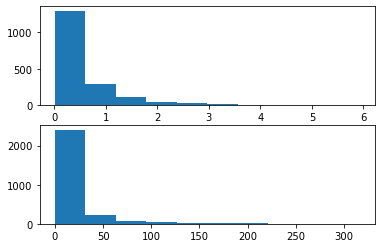

In [12]:
fig, ax = plt.subplots(2)

ax[0].hist(belize['reviews_per_month'])
ax[1].hist(belize['number_of_reviews'])

##### 2.	Create a box and whisker plot for availability_365. What does this show you?

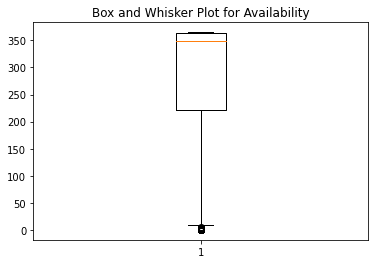

In [13]:
fig, ax = plt.subplots()
ax.boxplot(belize['availability_365'])
ax.set_title("Box and Whisker Plot for Availability")
plt.show()

##### 3. What is the probability that the price for an Airbnb is under $50?

In [16]:
price_min = belize['price'].min()
price_max = belize['price'].max()

uniform.cdf(50, price_min, price_max)

0.002544960977265015

##### 4.	Calculate the sample variance and standard deviation for all the numerical columns in the same output. 
   ##### a.	Why sample variance and not population variance?
   ##### b.	What is your takeaway for each metric?
   ##### c.	What are the scales of measurement for each of these values? 


In [24]:
belize.agg([np.var, np.std])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
var,1.661428e+14,1.036327e+16,0.288841,0.147361,317109.568066,32.147122,919.773508,0.438448,2674.046405,14548.613157
std,1.288964e+07,1.018001e+08,0.537440,0.383876,563.124825,5.669843,30.327768,0.662154,51.711183,120.617632


##### 5.	What percent of Airbnb listings in Belize are available 360 days a year or more?
##### a.	360 days or less?
##### b.	What distribution does this data most closely fit?


In [40]:
belize_mean = belize['price'].mean()
belize_std = belize['price'].std()

more_360 = 1 - norm.cdf(360, belize_mean, belize_std)
print(more_360)

less_360 = norm.cdf(360, belize_mean, belize_std)
print(less_360)

0.49794714370879867
0.5020528562912013


##### 6.	What minimum night count are 75% of Airnbnb listing in Belize greater than?

In [44]:
nights_mean = belize['minimum_nights'].mean()
nights_std = belize['minimum_nights'].std()

norm.ppf(.75, nights_mean, nights_std)

6.088199627067947